In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

(array([ 11.,  43.,  79., 195., 227., 189., 147.,  84.,  16.,   9.]),
 array([-2.84722154, -2.26456299, -1.68190445, -1.0992459 , -0.51658735,
         0.06607119,  0.64872974,  1.23138829,  1.81404683,  2.39670538,
         2.97936393]),
 <BarContainer object of 10 artists>)

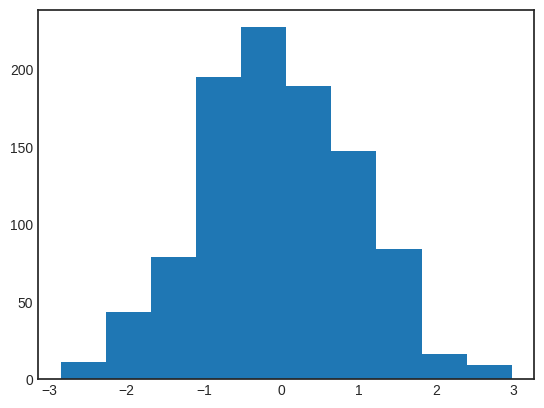

In [8]:
data = np.random.randn(1000)

plt.hist(data)

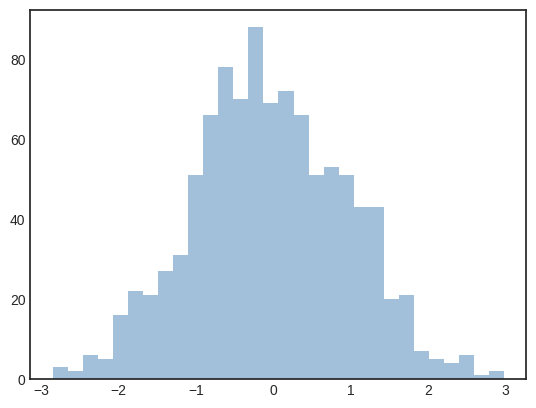

In [9]:
plt.hist(
    data,
    bins=30,
    # normed=True,
    alpha=0.5,
    histtype='stepfilled',
    color='steelblue',
    edgecolor='none'
);

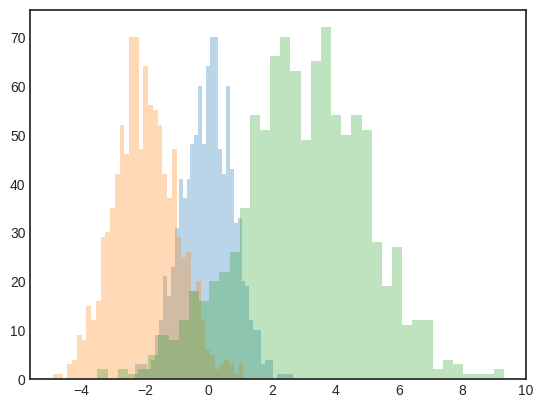

In [11]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Если требуется расчитать значения для гистограммы и не выводить график, то можно воспользоваться функцией `np.histogram()`:

In [13]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 54 274 416 231  25]


## Двумерные гистограммы и привязки (binninbs)

Точно также как мы создавали гистограммы путем распределения значений по диапазонам (bins), мы можем создать гистограмму для двумерных данных путем распределения значений по двум измерениям.

In [14]:
mean =[0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### `plt.hist2d`: Двумерная гистограмма

Используем функцию `plt.hist2d`

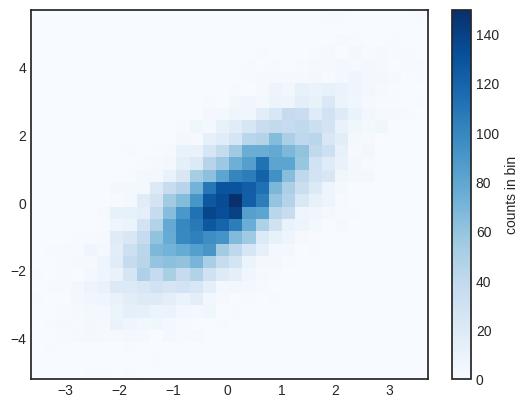

In [16]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### `plt.hexbin` Гескагональные привязки



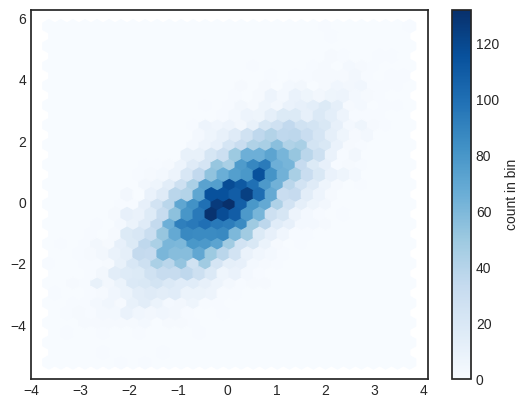

In [17]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Оценка плотности ядра

Оценка плотности ядра (kernel density estimation), мы будем более подробно рассматривать этот вопрос далее. Одним из способов реализации KDE является `scipy.stats`:

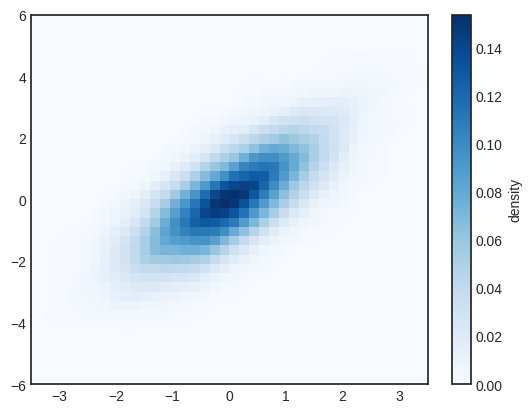

In [18]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")